In [1]:
# This is a Jupyter Notebook to perfrom Clustering
# Methods Currently Implemented:
#      - K-Means Clustering (scikit-learn)
#      - Agglomerative Hierarchical Clustering (scikit-learn)
#
# Author: Christopher Avery
# Last Update: January 27, 2020

In [2]:
import pandas as pd
import sklearn.cluster as clst
import sklearn.preprocessing as pre
import supportMethods as supp

In [3]:
# Parameters: K-means
num_clusters = 2

# Parameters: Agglomerative Hierarchical Clustering
num_clusters_var = 5
aff='cosine' #distance metric: {euclidean, manhattan, cosine, precomputted}
link='average' #cluster linkage metric: {average, complete, single, ward}

In [4]:
# Load data
path_to_data = 'C:\\Users\\csa97\\Research\\Projects\\DuLab\\ADAP-ML\\adap-ml\\data\\SCLC_study_output_filtered_2.csv'
df = pd.read_csv(path_to_data, index_col=0)
sample_names = df.index.values.tolist()
variable_names = df.columns.values.tolist()
M = len(sample_names)
N = len(variable_names)

In [5]:
# Normalize data: Auto-Scaling
#     - Mean Center
#     - Uniform Variance scaling
scaler = pre.StandardScaler().fit(df)
df_norm = scaler.transform(df)

In [6]:
# Perform K-Means Clustering
k_means = clst.KMeans(num_clusters).fit(df_norm)
print(k_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [7]:
# Perform Hierarchical Clustering (on samples)
hier_clust_samp = clst.AgglomerativeClustering(n_clusters=num_clusters,
                                      affinity=aff,
                                      linkage=link)
hier_clust_samp.fit(df_norm)
print(hier_clust_samp)

# Perform Hierarchical Clustering (on variables)
hier_clust_var = clst.AgglomerativeClustering(n_clusters=num_clusters_var,
                                      affinity=aff,
                                      linkage=link)
hier_clust_var.fit(df_norm.transpose())
print(hier_clust_var)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')


In [8]:
# K-Means Results
print("Clusters Of Samples Found Using K-Means Clustering:")
k_means_clusters = supp.getClusterResults(k_means, sample_names, num_clusters)
print(k_means_clusters)

Clusters Of Samples Found Using K-Means Clustering:
          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2


Clusters Of Samples Found Using Agglomerative Clustering:
          Cluster 1       Cluster 2
0      NSCLC_A549_1     SCLC_86M1_2
1     NSCLC_H1703_2     SCLC_86M1_1
2     NSCLC_H1703_1     SCLC_16HV_1
3      NSCLC_A549_2     SCLC_16HV_2
4     NSCLC_H1437_1    SCLC_DMS79_1
5     NSCLC_H2228_1    SCLC_DMS79_2
6     NSCLC_H2228_2     SCLC_H187_2
7     NSCLC_H1437_2     SCLC_H187_1
8     NSCLC_H3122_1     SCLC_H209_1
9      NSCLC_H322_2     SCLC_H524_1
10     NSCLC_H322_1     SCLC_H209_2
11     NSCLC_H358_2     SCLC_H524_2
12    NSCLC_H3122_2      SCLC_H69_1
13     NSCLC_H522_1      SCLC_H82_1
14     NSCLC_H522_2      SCLC_H82_2
15  NSCLC_HCC4006_1      SCLC_H69_2
16     NSCLC_H358_1     SCLC_N417_2
17      NSCLC_PC9_1     SCLC_N417_1
18      NSCLC_PC9_2  SCLC_SW210-5_1
19  NSCLC_HCC4006_2  SCLC_SW210_5_2

Clusters Of Variables Found Using Agglomerative Clustering:
  Cluster 1 Cluster 2 Cluster 3 Cluster 4 Cluster 5
0       295      1078      1076      1162       961
1       464      1150

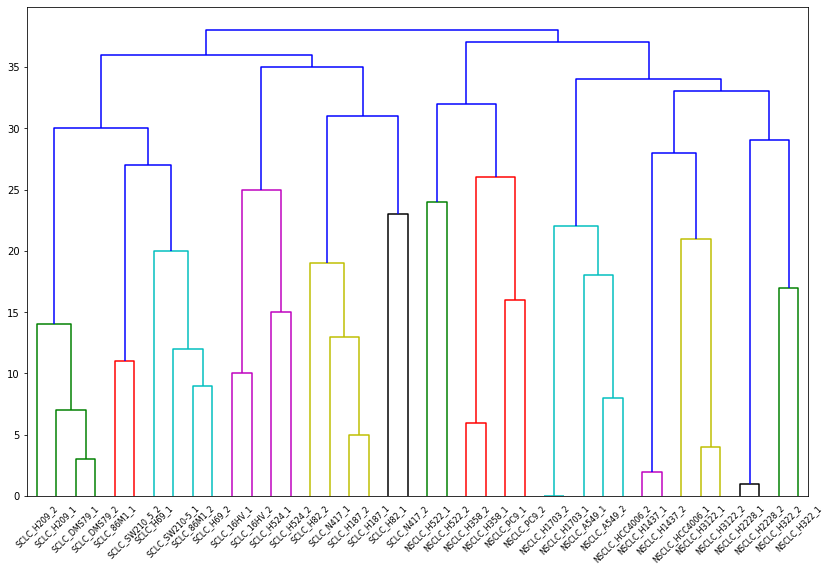

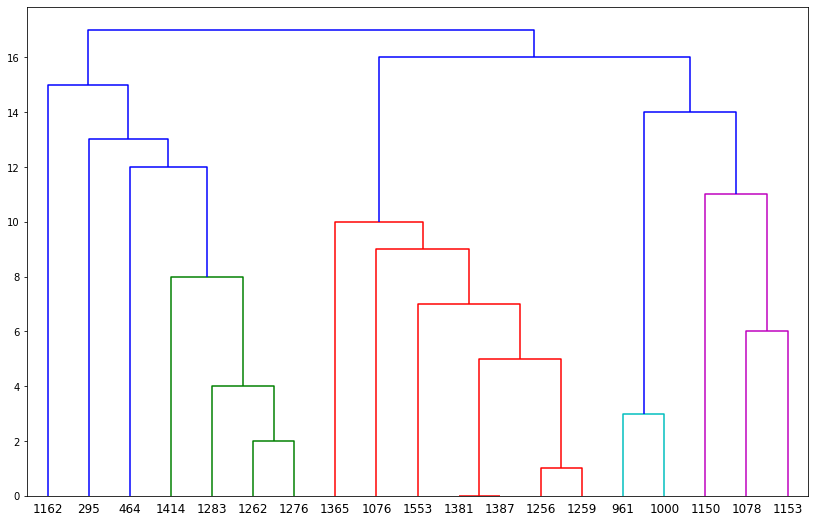

In [9]:
# Agglomerative Clustering Results
print("Clusters Of Samples Found Using Agglomerative Clustering:")
hier_samp_clusters = supp.getClusterResults(hier_clust_samp, sample_names, num_clusters)
print(hier_samp_clusters)
#dend_samp = plt.figure()
supp.plot_dendrogram(hier_clust_samp, sample_names)

print()
print("Clusters Of Variables Found Using Agglomerative Clustering:")
hier_var_clusters = supp.getClusterResults(hier_clust_var, variable_names, num_clusters_var)
print(hier_var_clusters)
#dend_var = plt.figure()
supp.plot_dendrogram(hier_clust_var, variable_names)